In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append("../")
from predpy.preprocessing import set_index

In [2]:
from predpy.dataset import TimeSeriesRecordsDataset, SingleTimeSeriesDataset
from predpy.data_module import TimeSeriesModule
from predpy.experimentator import Experimentator, DatasetParams, ModelParams
from predpy.preprocessing import (
    load_and_preprocess, set_index, scale, moving_average, drop_if_is_in,
    use_dataframe_func, select_columns)
from predpy.trainer import CheckpointParams, TrainerParams, EarlyStoppingParams, LoggerParams

import pickle
from sklearn.preprocessing import MinMaxScaler
from tsai.models import TCN, ResNet, TST, RNN, TransformerModel, FCN
import pandas as pd
import seaborn as sns

from typing import List, Dict, Union, Any, Literal, Tuple

In [4]:
import sys
sys.path.append("/home/stachu/Projects/Anomaly_detection/Forecasting_models")

from predpy.dataset import TimeSeriesRecordsDataset
from predpy.dataset import SingleTimeSeriesDataset
from predpy.experimentator import Experimentator, DatasetParams, ModelParams
from predpy.preprocessing import set_index, scale
from predpy.preprocessing import moving_average
from predpy.preprocessing import (
    load_and_preprocess, set_index, scale, moving_average, drop_if_is_in,
    use_dataframe_func, select_columns)
from predpy.trainer import (
    CheckpointParams, TrainerParams, EarlyStoppingParams, LoggerParams)

import pickle
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tsai.models import TCN, ResNet, TST, RNN, TransformerModel, FCN
import pandas as pd


# First experiment
# ================

datasets_params = [
    DatasetParams(
        path="../data/daily-min-temperatures.csv",
        target="Temp",
        split_proportions=[0.8, 0.1, 0.1],
        window_size=366,
        batch_size=64,
        DatasetCls=SingleTimeSeriesDataset,
        pipeline=[
            (set_index, {"column_name": "Date"}),
            (scale, {"training_fraction": 0.8, "scaler": MinMaxScaler()}),
            (moving_average, {"window_size": 20, "col_names": ["Temp"]})
        ])
]

# Second experiment
# ================
# load_params = {
#     "sep": ';', "header": 0, "low_memory": False,
#     "infer_datetime_format": True, "parse_dates": {'datetime': [0, 1]},
#     "index_col": ['datetime']
# }
# pipeline = [
#     (drop_if_is_in, (["?", np.nan]), {"columns": ["Global_active_power"]}),
#     (use_dataframe_func, "astype", "float"),
#     (select_columns, ["Global_active_power"])
# ]
# datasets_params = [
#     DatasetParams(
#         path="./data/household_power_consumption.csv",
#         load_params=load_params,
#         target="Global_active_power",
#         split_proportions=[0.8, 0.1, 0.1],
#         window_size=366,
#         batch_size=64,
#         DatasetCls=SingleTimeSeriesDataset,
#         pipeline=pipeline)
# ]


# ALMOST SAME SECTION
# ===================

# models_params = [
#     ModelParams(
#         name_="ResNet", cls_=ResNet.ResNet,
#         init_params={"c_in": 2, "c_out": 1}),
#     # ModelParams(
#     #     name_="LSTM_h200_l1", cls_=RNN.LSTM,
#     #     init_params={
#     #         "c_in": 2, "c_out": 1, "hidden_size": 200, "n_layers": 1})
# ]

# chp_p = CheckpointParams(
#     dirpath="../checkpoints", monitor='val_loss', verbose=True,
#     save_top_k=1)
# tr_p = TrainerParams(
#     max_epochs=1, gpus=1, auto_lr_find=True)
# es_p = EarlyStoppingParams(
#     monitor='val_loss', patience=3, verbose=True)

# exp = Experimentator(models_params, datasets_params)

# exp.run_experiments(
#     "lightning_logs", tr_p, chp_p, es_p,
#     experiments_path="saved_experiments", safe=False)

# print("true_vals: ", exp.datasets_params.iloc[0].true_values.shape[0])
# print("preds: ", exp.predictions.iloc[0]["predictions"].__len__())
exp.plot_predictions(0, file_name="predictions.html")


In [3]:
def power_consumption_preprocessing(pc: pd.DataFrame):
    # rec_to_drop = pc[pc["Global_active_power"].isin(["?", np.nan])].index
    pc = pc.drop(
        pc[pc["Global_active_power"].isin(["?", np.nan])].index)
    pc = pc.astype({"Global_active_power": "float"})
    pc = pc[["Global_active_power"]]
    return pc


In [4]:
load_params = {
    "sep": ';', "header": 0, "low_memory": False,
    "infer_datetime_format": True, "parse_dates": {'datetime': [0, 1]},
    "index_col": ['datetime']
}

df = pd.read_csv("../data/household_power_consumption.csv", **load_params)
# df = power_consumption_preprocessing(df)

In [7]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [6]:
# use_dataframe_func(tmp[["Global_active_power"]], "astype", "float")

In [ ]:
None=1

In [7]:
load_params = {
    "sep": ';', "header": 0, "low_memory": False,
    "infer_datetime_format": True, "parse_dates": {'datetime': [0, 1]},
    "index_col": ['datetime']
}
pipeline = [
    (drop_if_is_in, (["?", np.nan]), {"columns": ["Global_active_power"]}),
    (use_dataframe_func, "astype", "float"),
    (select_columns, ["Global_active_power"])
]

In [8]:
chp_p = CheckpointParams(
    dirpath="../checkpoints", monitor='val_loss', verbose=True,
    save_top_k=1)
tr_p = TrainerParams(
    max_epochs=1, gpus=1, auto_lr_find=True)
es_p = EarlyStoppingParams(
    monitor='val_loss', patience=3, verbose=True)

load_params = {
    "sep": ';', "header": 0, "low_memory": False,
    "infer_datetime_format": True, "parse_dates": {'datetime': [0, 1]},
    "index_col": ['datetime']
}

models_params = [
    # ModelParams(
    #     name_="ResNet", cls_=ResNet.ResNet, init_params={"c_in": 1, "c_out": 1}),
    ModelParams(
        name_="LSTM_h200_l1", cls_=RNN.LSTM, init_params={"c_in": 1, "c_out": 1, "hidden_size": 200, "n_layers": 1})
]
datasets_params = [
    DatasetParams(
        path="../data/household_power_consumption.csv",
        load_params=load_params,
        target="Global_active_power",
        split_proportions=[0.8, 0.1, 0.1],
        window_size=366,
        batch_size=64,
        DatasetCls=SingleTimeSeriesDataset,
        pipeline=pipeline)
]
exp = Experimentator(models_params, datasets_params)

In [9]:
exp.run_experiments("../lightning_logs", tr_p, chp_p, es_p, experiments_path="../saved_experiments", safe=False)

TypeError: ("astype() missing 1 required positional argument: 'dtype'", 'Error occured in 1 pipeline step with function "use_dataframe_func".', 'Error during setup 0 dataset named household_power_consumption.')

In [ ]:
# exp.plot_predictions(0)
print("true_vals: ", exp.datasets_params.iloc[0].true_values.shape[0])
print("preds: ", exp.predictions.iloc[0]["predictions"].__len__())

true_vals:  204893
preds:  3202


In [14]:
exp.predictions.iloc[0]["predictions"]

[1.4137221574783325,
 2.3639609813690186,
 1.6348891258239746,
 0.24813933670520782,
 0.2982240915298462,
 0.18980713188648224,
 0.40702152252197266,
 0.25395840406417847,
 0.22899359464645386,
 1.4325226545333862,
 1.3717377185821533,
 2.1863045692443848,
 1.421517252922058,
 0.6369308233261108,
 0.3906247019767761,
 0.5771422386169434,
 0.2028626948595047,
 1.4427860975265503,
 1.8202863931655884,
 0.6477362513542175,
 0.5739530920982361,
 3.7514071464538574,
 1.38194739818573,
 1.1946107149124146,
 0.9088665246963501,
 0.3542744517326355,
 0.8407065272331238,
 0.27257174253463745,
 0.995392918586731,
 1.4463118314743042,
 0.24299384653568268,
 1.408655047416687,
 1.5616129636764526,
 0.21379615366458893,
 0.28202682733535767,
 0.7673344612121582,
 1.1499541997909546,
 1.8980611562728882,
 1.266289234161377,
 0.9200962781906128,
 1.6740506887435913,
 1.051832914352417,
 1.1790519952774048,
 1.0592657327651978,
 2.721888542175293,
 1.6158950328826904,
 1.5835603475570679,
 3.781133651

In [6]:
None=1

SyntaxError: cannot assign to None (<ipython-input-6-c50d50884aea>, line 1)

In [ ]:
pc = pd.read_csv(
    '../data/household_power_consumption.csv', sep=';', header=0, low_memory=False,
    infer_datetime_format=True, parse_dates={'datetime':[0,1]},
    index_col=['datetime'])

In [ ]:
pc.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
# pc = combine_str_columns(pc, ["Date", "Time"], "Date", sep=" ", drop=True)

In [ ]:
# pc = to_datetime(pc, "Date", format='%d/%m/%Y %H:%M:%S')

In [ ]:
# pc = set_index(pc, "Date")

In [ ]:
rec_to_drop = pc[pc["Global_active_power"].isin(["?", np.nan])].index
pc = pc.drop(rec_to_drop)

In [ ]:
pc.dtypes

Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [ ]:
pc = pc.astype({"Global_active_power": "float"})

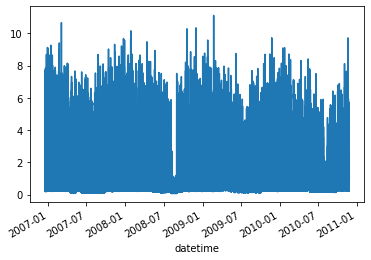

In [ ]:
pc["Global_active_power"].plot();